In [1]:
import wrangle as wrg
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor


import env

In [2]:
sql_query = sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt from properties_2017 join predictions_2017 on properties_2017.parcelid = predictions_2017.parcelid where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017_project.csv"


In [3]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
zillow_2017.shape

(52442, 5)

In [5]:
zillow_2017.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0,4.0,3.5,3100.0,1023282.0
1,1,2.0,1.0,1465.0,464000.0
2,2,3.0,2.0,1243.0,564778.0
3,3,4.0,3.0,2376.0,145143.0
4,4,4.0,3.0,2962.0,773303.0


In [6]:
zillow_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52442 non-null  int64  
 1   bedroomcnt                    52442 non-null  float64
 2   bathroomcnt                   52442 non-null  float64
 3   calculatedfinishedsquarefeet  52360 non-null  float64
 4   taxvaluedollarcnt             52441 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


In [7]:
wrg.is_it_null(zillow_2017)  

False    52442
Name: Unnamed: 0, dtype: int64
False    52442
Name: bedroomcnt, dtype: int64
False    52442
Name: bathroomcnt, dtype: int64
False    52360
True        82
Name: calculatedfinishedsquarefeet, dtype: int64
False    52441
True         1
Name: taxvaluedollarcnt, dtype: int64


In [8]:
zillow_2017=wrg.wrangle_zillow(zillow_2017)

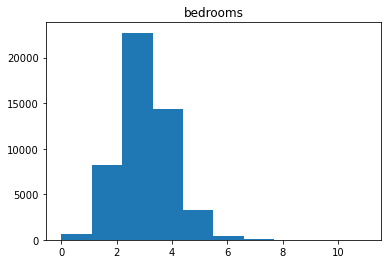

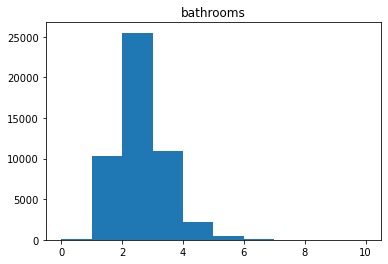

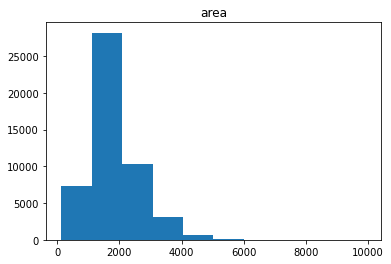

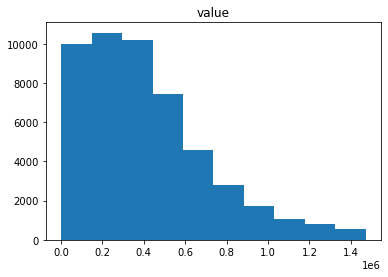

In [9]:
wrg.plot_uni_var(zillow_2017)

In [10]:
#need to remove zeros
zillow_2017.bathrooms.value_counts()

2.0     21613
3.0     10198
1.0      9508
2.5      3875
4.0      1767
1.5       836
3.5       779
4.5       463
5.0       449
6.0        88
5.5        80
0.0        45
7.0        19
6.5        10
8.0         5
7.5         4
9.0         1
10.0        1
Name: bathrooms, dtype: int64

In [11]:
#need to remove zeros
zillow_2017.bedrooms.value_counts()

3     22737
4     14333
2      8203
5      3272
1       593
6       456
7        69
0        60
8        10
9         6
10        1
11        1
Name: bedrooms, dtype: int64

In [19]:
#a function that plots the distribtuiton of a target variable with a mean line
def plot_target_var(df_name, target_var):
    plt.hist(df_name[target_var])
    plt.axvline(df_name[target_var].mean(), color='k', linestyle='dashed', linewidth=1) 
    plt.title("Distribution of Home Values")
    plt.show() 

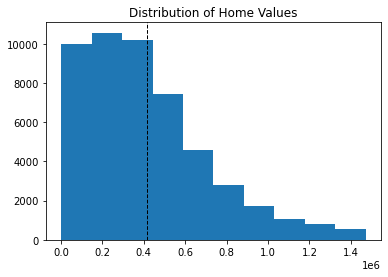

In [20]:
plot_target_var(zillow_2017,'value')

In [13]:
train_zillow, validate_zillow, test_zillow = wrg.split_function_cont_target(zillow_2017)

In [14]:
train_zillow.shape

(29844, 4)

bedrooms
bathrooms
area
value
AREA and value


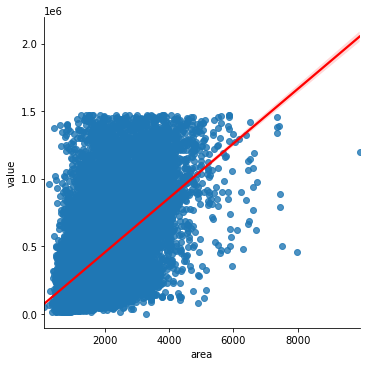

VALUE and value


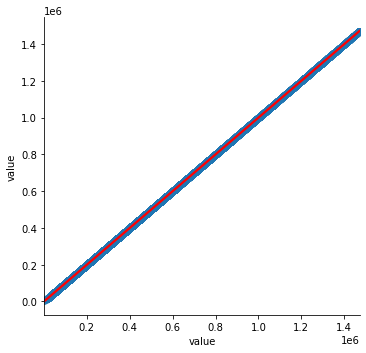

In [15]:
#calls a function that plots the distribution of each cont variable the dataframe against the target variable cat_count is set to 20 to remove beds and baths
wrg.plot_variable_target_pairs(train_zillow,"value", 20) 

bedrooms
bathrooms
area
value


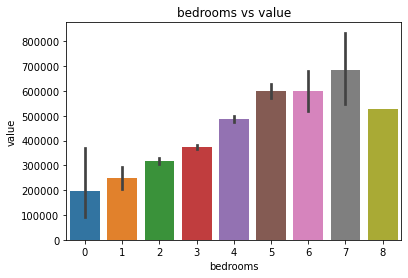

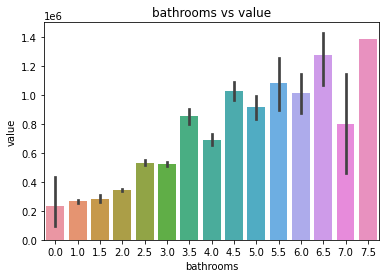

In [16]:
#This plots all the categorical variables against the target variable. Cat_count is set to 20 to make beds and baths categorical
wrg.plot_categorical_and_target_var(test_zillow, "value", 20)

In [17]:
#half bathrooms seems to effect value. Make a categorical feature for half bathrooms

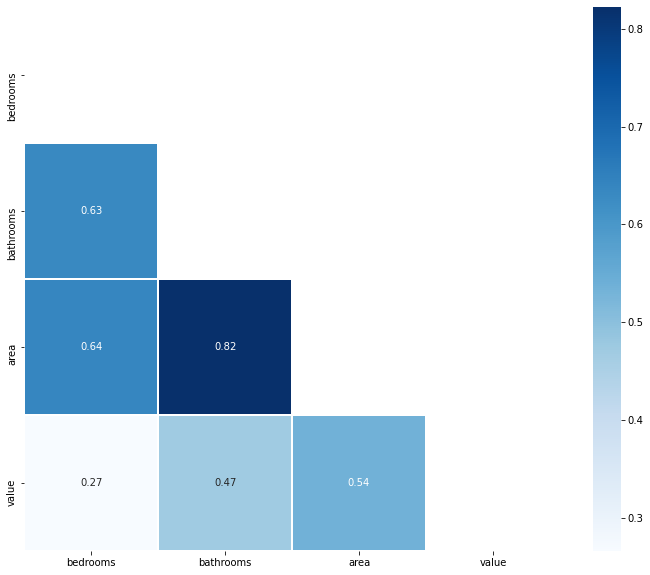

In [18]:
wrg.corr_heatmap(train_zillow)

### Stat testing

In [ ]:
#scale the data

In [ ]:
#modeling